# Parsing & POS application 

```
Plan : 
  1. Parts of Speech (POS) Tagging
  2. Shallow Parsing or Chunking
  3. Constituency Parsing
  4. Dependency Parsing
  5. Application of POS (Named Entity Recognition)
```

## 1. Parts of Speech (POS) Tagging


1. Use Spacy and NLTK and compare the results 


**More details in next lab**

In [50]:
import nltk
from nltk import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [51]:
sentence = word_tokenize("allow us to add lines in list of allow actions")
nltk.pos_tag(sentence)

[('allow', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('add', 'VB'),
 ('lines', 'NNS'),
 ('in', 'IN'),
 ('list', 'NN'),
 ('of', 'IN'),
 ('allow', 'JJ'),
 ('actions', 'NNS')]

In [52]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp("allow us to add lines in list of allow actions")

for token in doc:
    print(token.text, token.tag_)

allow VB
us PRP
to TO
add VB
lines NNS
in IN
list NN
of IN
allow JJ
actions NNS


### 1.1 Try it yourself

Using Python libraries, download Wikipedia's page on topic of your choice and tag the text parts of speech.

You can use wikipedia api to retrieve the wikipedia page : [`pip install Wikipedia-API`](https://pypi.org/project/Wikipedia-API/)

In [53]:
import wikipedia

page = wikipedia.page("Ian_Goodfellow")
text = page.content
text
 

"Ian J. Goodfellow (born 1985 or 1986) is an American computer scientist, engineer, and executive, most noted for his work on artificial neural networks and deep learning. He was previously employed as a research scientist at Google Brain and director of machine learning at Apple and has made several important contributions to the field of deep learning including the invention of the generative adversarial network (GAN). Goodfellow co-wrote  the textbook Deep Learning (2016) and wrote the chapter on deep learning in the most popular textbook in the field of artificial intelligence, Artificial Intelligence: A Modern Approach (used in more than 1,500 universities in 135 countries).\n\n\n== Education ==\nGoodfellow obtained his B.S. and M.S. in computer science from Stanford University under the supervision of Andrew Ng (co-founder and head of Google Brain), and his Ph.D. in machine learning from the Université de Montréal in April 2014, under the supervision of Yoshua Bengio and Aaron Co

## 2. Shallow Parsing or Chunking

A process of extracting phrases from unstructured text. Chunking groups adjacent tokens into phrases on the basis of their POS tags. There are some standard well-known chunks such as noun phrases, verb phrases, and prepositional phrases.

There are five major categories of phrases : **Noun phrase (NP), Adjective phrase (ADJP), Verb phrase (VP), Prepositional phrase (PP), Adverb phrase (ADVP)**

In [54]:
import nltk
nltk.download('conll2000')
  

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [55]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1])

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


## 3. Constituency Parsing

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. A constituency parser can be built based on such grammars/rules. The grammer has to be defined. 

One of the popular Constituency Parsing implementation is from stanford. A **probabilistic context-free grammar parser**

**TODO: Implement an example** <br>
Parser can be downloaded here : `https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip`

Online tutorial : 

In [56]:
# Download and unzip the parser
# !wget http://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
# !unzip stanford-parser-4.2.0.zip

In [57]:
import nltk, os
from nltk.parse.stanford import StanfordParser

os.environ['CLASSPATH'] = './stanford-parser-full-2020-11-17/*'
os.environ['JAVAHOME'] = "C:\\Program Files\\Java\\jdk-17.0.5\\bin"

scp = StanfordParser('./stanford-parser-full-2020-11-17/stanford-parser.jar','./stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')

sentence = "Innopolis University is a university located in the city of Innopolis."

result = list(scp.raw_parse(sentence))
print(result[0])

C:\Users\Aleksandr\AppData\Local\Temp\ipykernel_14656\1058949011.py:7: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  scp = StanfordParser('./stanford-parser-full-2020-11-17/stanford-parser.jar','./stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')


(ROOT
  (S
    (NP (NNP Innopolis) (NNP University))
    (VP
      (VBZ is)
      (NP
        (NP (DT a) (NN university))
        (VP
          (VBN located)
          (PP
            (IN in)
            (NP
              (NP (DT the) (NN city))
              (PP (IN of) (NP (NNP Innopolis))))))))
    (. .)))


In [58]:
## To display in colab

os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'  

For the tags meanings [see](https://web.archive.org/web/20130517134339/http://bulba.sdsu.edu/jeanette/thesis/PennTags.html)

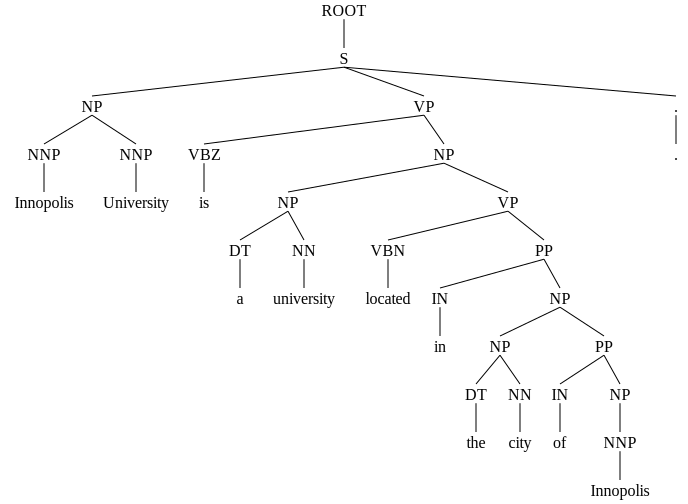

In [59]:
from IPython.display import display
display(result[0])

### 3.1 Try it on your sentence

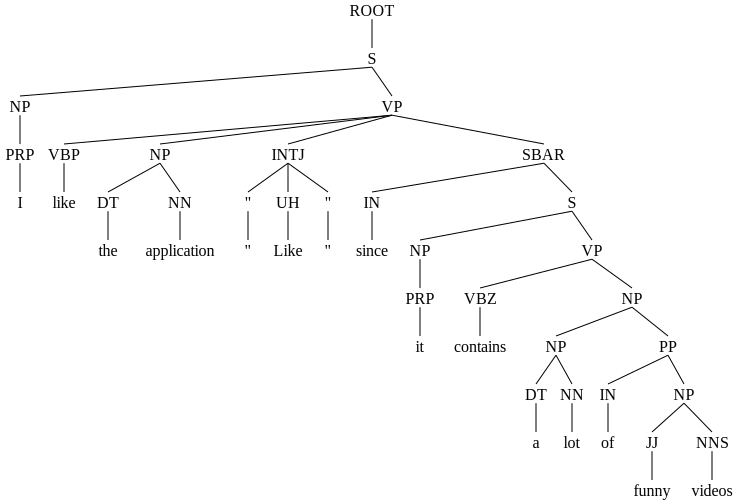

In [60]:
sentence = "I like the application \"Like\" since it contains a lot of funny videos"

result = list(scp.raw_parse(sentence))
display(result[0])

## 4. Dependency Parsing

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence. 

![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)

Dependency Parsing used in shallow parsing and named entity recognition



In [61]:
import spacy
import nltk

nlp = spacy.load("en_core_web_sm")

sentence_nlp = nlp("US unvails world's most powerful supercomputer, beats China")
sentence_nlp = nlp("Innopolis University is a university located in the city of Innopolis.")

In [62]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

### 4.1 Try it on your sentence

In [63]:
sentence = nlp("Apples are very tasty")
displacy.render(sentence, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})


## 5. Named Entity Recognition

Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.

In [64]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Aleksandr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## 5.1 Get data

In [65]:
sentence = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'


## Preprocess the data 

In [66]:
def preprocess(sent):
  sent = nltk.word_tokenize(sent)
  sent = nltk.pos_tag(sent)
  return sent

sent = preprocess(sentence)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

## Define pattern to parse the data

In [67]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [68]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


## Parse data and visualize

In [69]:
NPChunker = nltk.RegexpParser(pattern) 
result = NPChunker.parse(sent)

In [70]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


## NER with spacy

SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus 

In [71]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

## Get data

**en_core_web_sm** : English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer

In [72]:
nlp = en_core_web_sm.load()
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google a record $5.1 billion', 'ORG'),
 ('Wednesday', 'DATE')]


In [73]:
doc.text

'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

## TASK

1. Using Python libraries, download Wikipedia's page on topic of your choice and apply NER (using NLTK and spacy). 
1. Compare the results and visualize one paragraph with with entities assigned to words (you can try spacy visualization tool [`displacy`](https://spacy.io/usage/visualizers)) 

In [74]:
pptext = preprocess(text)
pptext

[('Ian', 'NNP'),
 ('J.', 'NNP'),
 ('Goodfellow', 'NNP'),
 ('(', '('),
 ('born', 'JJ'),
 ('1985', 'CD'),
 ('or', 'CC'),
 ('1986', 'CD'),
 (')', ')'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('American', 'JJ'),
 ('computer', 'NN'),
 ('scientist', 'NN'),
 (',', ','),
 ('engineer', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('executive', 'NN'),
 (',', ','),
 ('most', 'RBS'),
 ('noted', 'VBN'),
 ('for', 'IN'),
 ('his', 'PRP$'),
 ('work', 'NN'),
 ('on', 'IN'),
 ('artificial', 'JJ'),
 ('neural', 'JJ'),
 ('networks', 'NNS'),
 ('and', 'CC'),
 ('deep', 'JJ'),
 ('learning', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('was', 'VBD'),
 ('previously', 'RB'),
 ('employed', 'VBN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('research', 'NN'),
 ('scientist', 'NN'),
 ('at', 'IN'),
 ('Google', 'NNP'),
 ('Brain', 'NNP'),
 ('and', 'CC'),
 ('director', 'NN'),
 ('of', 'IN'),
 ('machine', 'NN'),
 ('learning', 'NN'),
 ('at', 'IN'),
 ('Apple', 'NNP'),
 ('and', 'CC'),
 ('has', 'VBZ'),
 ('made', 'VBN'),
 ('several', 'JJ'),
 ('important', 'JJ'),


In [75]:
nltk_ner = tree2conlltags(pptext)
spacy_ner = nlp(text)
pprint([(X.text, X.label_) for X in spacy_ner.ents])

[('Ian J. Goodfellow', 'PERSON'),
 ('1985', 'DATE'),
 ('1986', 'DATE'),
 ('American', 'NORP'),
 ('Google Brain', 'ORG'),
 ('Apple', 'ORG'),
 ('GAN', 'ORG'),
 ('Deep Learning', 'FAC'),
 ('2016', 'DATE'),
 ('more than 1,500', 'CARDINAL'),
 ('135', 'CARDINAL'),
 ('B.S.', 'GPE'),
 ('M.S.', 'GPE'),
 ('Stanford University', 'ORG'),
 ('Andrew Ng', 'PERSON'),
 ('Google Brain', 'ORG'),
 ('Ph.D.', 'WORK_OF_ART'),
 ('the Université de Montréal', 'FAC'),
 ('April 2014', 'DATE'),
 ('Yoshua Bengio', 'ORG'),
 ('Aaron Courville', 'PERSON'),
 ('Deep', 'PERSON'),
 ('Google Brain', 'ORG'),
 ('March 2016', 'DATE'),
 ('OpenAI', 'GPE'),
 ('11 months later', 'DATE'),
 ('March 2017', 'DATE'),
 ('Google Research', 'ORG'),
 ('Apple', 'ORG'),
 ('the Special Projects Group', 'ORG'),
 ('Apple', 'ORG'),
 ('April 2022', 'DATE'),
 ('Apple', 'ORG'),
 ('GAN', 'ORG'),
 ('two', 'CARDINAL'),
 ('Google Maps', 'ORG'),
 ('Street View', 'FAC'),
 ('Recognition', 'ORG'),
 ('2017', 'DATE'),
 ("MIT Technology Review's", 'ORG'),
 

In [79]:
displacy.render(spacy_ner,  style="ent")